# COGS 108 - Analyzing the Difficulty of Wordle Puzzles

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Our group analyzed Wordle tweets data to determine whether a Wordle puzzle’s difficulty could be correlated with any particular characteristics of the Wordle puzzle’s word (e.g., having duplicate letters, being common or obscure, etc.). We looked at formatted Wordle results posted to Twitter to calculate the puzzle’s average score for each Wordle puzzle. We then determined which characteristics the puzzle’s word has and analyzed our data to find any correlations. We did not come to any conclusion about the effect of these factors. 

# Names

- Roger Thavixay
- Yunfei Jiao
- David Wang
- Sidney Ma
- Akira Isayama

<a id='research_question'></a>
# Research Question

What factors affect how many guesses people need to solve a Wordle question? Factors include the obscurity of the word, the structure of the word (how many consonants, whether or not there are duplicate letters), and hints (how the player performs after getting a few letters correct).

<a id='background'></a>

## Background & Prior Work

Wordle is a daily word-guessing game in which the player has six attempts to guess a five letter-word correctly. After each attempt, letters in the correct position are displayed green, letters in the wrong position are displayed yellow, and letters that do not appear in the word are displayed gray. Players use this information to guess the word in as few attempts as possible (1). Using the website’s “Share” function, players can copy their Wordle results as a string depicting their attempts with colored square emojis – many players share these results on Twitter (2).

Wordle has been public since October 2021, and was purchased by the New York Times in January 2022 (3). Since then, players have complained that the daily Wordle puzzles have become more difficult. The New York Times responded that they did not intentionally alter the difficulty of Wordle – if anything, they made the game easier by eliminating more obscure words (4). However, it is evident that some Wordle puzzles have a significantly high average number of attempts, indicating that some words are more difficult to guess than others (5).

Some have set out to determine what exactly makes a Wordle word difficult. Many players point out that words with two occurrences of the same letter are particularly difficult to guess. Forbes observes that a surprising number of the most difficult words begin with 'F,' an uncommon starting letter (6). WordFinder highlights two characteristics about difficult words: they are obscure or do not follow predictable spelling patterns (5). In contrast, linguistics professor Dr. Matthew Voice points out that words with especially common n-grams (when letters are organized in common patterns) can be some of the hardest Wordles to solve (7).

Based on this information, we would like to examine some of these characteristics of Wordle words to see whether or not they are correlated with the word’s difficulty. We are interested in seeing whether our findings are consistent with the above observations.

References: 
- 1) https://www.nytimes.com/games/wordle/index.html
- 2) https://en.wikipedia.org/wiki/Wordle
- 3) https://www.washingtonpost.com/media/2022/01/31/new-york-times-wordle/
- 4) https://www.today.com/popculture/popculture/is-wordle-getting-harder-fans-questions-nytimes-rcna16623
- 5) https://wordfinder.yourdictionary.com/blog/the-hardest-wordle-puzzles-to-date-what-does-tacit-even-mean/
- 6) https://www.forbes.com/sites/mattgardner1/2022/05/04/wordles-hardest-ever-puzzles-prove-gamers-have-stopped-giving-an-f/?sh=469eb7f84e22
- 7) https://www.techradar.com/news/why-todays-wordle-answer-is-so-hard-according-to-the-experts 

# Hypothesis


We predict that obscurity, the structure of the word, and hints will all have a noticeable impact on how many guesses people need to solve a Wordle. We believe that obscurity and word structure will have a significant effect, because players will be less familiar with obscure words, requiring them to make more guesses. Additionally, since players typically use familiar spelling patterns to make better guesses, we expect that words with letters in an unusual order will also be more difficult to guess. The hints from the player's first few guesses should also be an important factor, as it helps them narrow down what the answer is.

# Datasets


- Dataset Name: wordle-words 
- Link to the dataset: https://github.com/swkasica/wordle-words/blob/master/wordle.csv 
- Number of observations: 12973 

This dataset includes all five-letter words that could be used in Wordle. For each word, it includes the word’s occurrence (its prevalence in Google Books Ngram Corpus) and the corresponding Wordle ID (the ordinal day that the word was used in the daily Wordle puzzle), if applicable. Functionally, we are only using about 120 words from this dataset.
- Dataset Name: Wordle Tweets 
- Link to the dataset: https://www.kaggle.com/datasets/benhamner/wordle-tweets 
- Number of observations: 567760 

This dataset includes Wordle results tweets for each Wordle puzzle since Wordle #210. It is updated daily, but our selection of this dataset only goes up to Wordle #333 (inclusive). For each observation, this dataset includes the Wordle ID, the tweet ID (a unique link to the tweet), the tweet date, the user’s Twitter username, and the tweet’s text. Since the Wordle Tweets dataset does not include any Wordle words, we combine it with the aforementioned wordle-words dataset in order to connect each Wordle ID to its corresponding word. This allows us to do all the analysis necessary for our project.

# Setup

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import patsy 
import statsmodels.api as sm 
import scipy.stats as stats 

# Data Cleaning

Data cleaning was fairly simple for our project. Since our selection of the Wordle Tweets dataset only includes data on Wordles 210 through 333, we limited our selection of the wordle-words dataset accordingly, obviously excluding words that have not been used as answers in Wordle. We removed any irrelevant columns from the Wordle Tweets dataset.

However, our project required a significant amount of data wrangling. Since our question involves many different variables, we consolidated everything into two large dataframes in order to prepare for data analysis. This involved many helper functions and connections between the two datasets.

### Importing our two datasets

In [ ]:
df_tweets = pd.read_csv('tweets.csv',usecols = ['wordle_id','tweet_text','tweet_date'])
df_tweets=df_tweets.rename(columns={'tweet_text': 'score'})
print(df_tweets.shape)
df_tweets

(567706, 3)


,wordle_id,tweet_date,score
0,210,2022-01-16 03:20:43+00:00,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,2022-01-16 03:20:46+00:00,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,2022-01-16 03:20:55+00:00,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,2022-01-16 03:20:58+00:00,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,2022-01-16 03:21:00+00:00,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
...,...,...,...
567701,333,2022-05-19 01:46:20+00:00,Wordle 333 3/6\n\n🟩⬛⬛🟨⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
567702,333,2022-05-19 01:46:20+00:00,Wordle 333 5/6\n\n🟨🟨⬛⬛⬛\n🟨🟨🟨⬛⬛\n🟩⬛🟨🟨⬛\n🟩⬛🟨🟩⬛\n...
567703,333,2022-05-19 01:46:28+00:00,Wordle 333 3/6\n\n⬛🟨⬛⬛⬛\n⬛🟨🟨🟨🟨\n🟩🟩🟩🟩🟩
567704,333,2022-05-19 01:46:35+00:00,Wordle 333 5/6\n\n⬛⬛⬛🟨⬛\n🟩⬛⬛🟨⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩⬛⬛\n...


Since **df_tweets** is limited to Wordles between 210 and 333, only include words where the day number within this range for **df_wordle**.
Sort the words in order of lowest to highest day number.
Convert the day column type to integer.
Reset the index, and remove the index column.


In [ ]:
df_wordle = pd.read_csv('wordle.csv', usecols = ['word','occurrence','day'])
df_wordle = df_wordle[df_wordle['day'].between(210, 333)].set_index('day').sort_values(by = ['day'])
print(df_wordle.shape)
df_wordle

(124, 2)


,word,occurrence
day,,
210.0,panic,8.325006e-06
211.0,solar,2.662317e-05
212.0,shire,5.516759e-07
213.0,proxy,4.724726e-06
214.0,point,2.967598e-04
...,...,...
329.0,badge,2.187235e-06
330.0,midst,9.460517e-06
331.0,canny,3.005782e-07


In [ ]:
print(df_tweets.isnull().values.any())
print(df_wordle.isnull().values.any())

False
False


### Cleaning df_tweets

We are not working with personal information, so remove the columns **tweet_id** and **tweet_username**. 
Let's also clean up the score of the tweets into its own column and turn the tweet itself into a smooth string.
In addition, when a person fails to solve a Wordle question, the score (e.g. 3/6) is replaced with X/6, but it doesnt appear that anyone reported that.

In [ ]:
# Determines if a word starts with a vowel. 
def starts_with_vowel(str_in): 
    if str_in[0] in 'aeiou': 
        return True 
    return False 
#cleans up the tweet dataframe to only include the score
def tweet_scores(str_in):  
    if str_in[11] in '1234567890' and str_in[13] in '1234567890' and str_in[12] == '/':
        output=str_in[11]
        output=int(output)
    elif str_in[11]=='X':
        output=7
    else:
        output=np.NaN
    return output
#isolate guesses
def tweet_guesses(str_in):  
    reduced_string = str_in[16:]
    reduced_string = reduced_string.replace("\n","")
    return reduced_string
#average score
def get_wordle_avg_score(wordle_number,tweet_dataframe): 
    temp=tweet_dataframe[tweet_dataframe['wordle_id']== wordle_number]
    return temp['score'].mean()

In [ ]:
df_tweets['guesses'] = df_tweets['score'].apply(tweet_guesses)
df_tweets['score'] = df_tweets['score'].apply(tweet_scores)

In [ ]:
df_tweets

,wordle_id,tweet_date,score,guesses
0,210,2022-01-16 03:20:43+00:00,4,⬛⬛🟨🟨⬛🟩⬛⬛⬛⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩
1,210,2022-01-16 03:20:46+00:00,4,⬜⬜⬜⬜⬜🟩🟩🟨🟨⬜🟩🟩⬜🟩🟨🟩🟩🟩🟩🟩
2,210,2022-01-16 03:20:55+00:00,4,⬜⬜⬜🟨⬜⬜🟩⬜🟨⬜⬜🟩⬜🟨⬜🟩🟩🟩🟩🟩
3,210,2022-01-16 03:20:58+00:00,3,⬜⬜🟨⬜⬜🟨🟨⬜⬜⬜🟩🟩🟩🟩🟩
4,210,2022-01-16 03:21:00+00:00,3,⬛⬛🟨⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩
...,...,...,...,...
567701,333,2022-05-19 01:46:20+00:00,3,🟩⬛⬛🟨⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩
567702,333,2022-05-19 01:46:20+00:00,5,🟨🟨⬛⬛⬛🟨🟨🟨⬛⬛🟩⬛🟨🟨⬛🟩⬛🟨🟩⬛🟩🟩🟩🟩🟩
567703,333,2022-05-19 01:46:28+00:00,3,⬛🟨⬛⬛⬛⬛🟨🟨🟨🟨🟩🟩🟩🟩🟩
567704,333,2022-05-19 01:46:35+00:00,5,⬛⬛⬛🟨⬛🟩⬛⬛🟨⬛🟩🟩🟩⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩


# Data Analysis & Results (EDA)

Let's first get the average score for each Wordle word. A higher score means that the person took more guesses to finish the wordle.

In [ ]:
new_column=[]
for i in range(210,334):
    new_column.append(get_wordle_avg_score(i,df_tweets))
df_wordle['average_score']=new_column
df_wordle

,word,occurrence,average_score
day,,,
210.0,panic,8.325006e-06,3.816003
211.0,solar,2.662317e-05,3.895992
212.0,shire,5.516759e-07,3.841601
213.0,proxy,4.724726e-06,4.612081
214.0,point,2.967598e-04,3.566778
...,...,...,...
329.0,badge,2.187235e-06,3.848840
330.0,midst,9.460517e-06,4.421585
331.0,canny,3.005782e-07,4.452707


Let's take a look. The words are ordered by time, so maybe we can see some trend in scores as people get better at Wordle?

Originally the graph was non-continuous, and further investigation showed that two wordle words had no tweets associated with them, so we removed them.

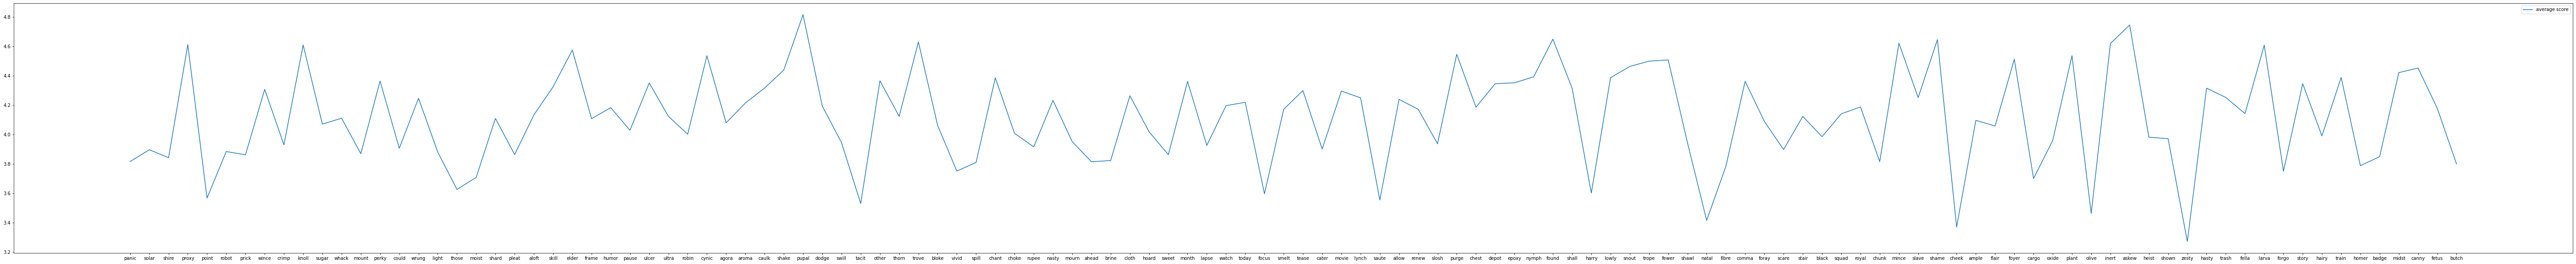

In [ ]:

df_wordle = df_wordle[df_wordle["word"] != 'their']
df_wordle = df_wordle[df_wordle["word"] != 'stove']

f2 = plt.gcf()
f2.set_figwidth(100)
f2.set_figheight(10)
plt.plot(df_wordle['word'],df_wordle['average_score'],label = 'average score')
plt.legend()
plt.show()

array([[<AxesSubplot:title={'center':'average_score'}>]], dtype=object)

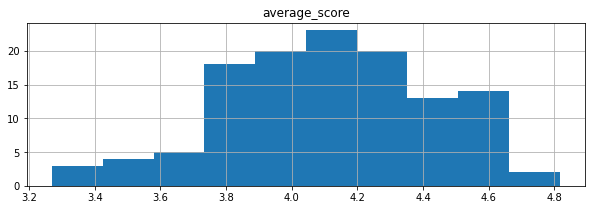

In [ ]:
df_wordle.hist(column =['average_score'],figsize = (10,3))

The Y axis shows the amount of words that have X score. We thought that maybe people are more likely to tweet when they have better scores(fewer guesses), which may skew our data. So, we plotted our distribution to help to visualize if there is a relationship between average score and the number of words that have that score.

The distribution seems a little biased against higher scores, but not enough to draw anything conclusive.

//todo

If the word starts with a vowel, does that impact how many guesses people need to solve the wordle?

In [ ]:
df_wordle['vowel']=df_wordle['word'].apply(starts_with_vowel)
print(df_wordle['vowel'].value_counts())
temp_vowel=df_wordle[df_wordle['vowel'] ==True]
temp_consonant=df_wordle[df_wordle['vowel'] ==False]
print('average scores of words that start with vowels:' , temp_vowel['average_score'].mean())
print('average scores of words that start with a consonant:' , temp_consonant['average_score'].mean())

False    107
True      15
Name: vowel, dtype: int64
average scores of words that start with vowels: 4.208699150235248
average scores of words that start with a consonant: 4.10327003851219


There doesn't appear to be a strong correlation between words that start with vowels and the difficulty of the word.

If someone guesses a letter correctly towards the beginning of the word, does this make thier subsequent guesses easier or harder?

In [ ]:
#Find out the location of the first letter(green box) they got it correct in the Wordle word
def first_green (str_in):
    count = 0
    for ele in str_in:
        count = count+ 1
        if ele == '🟩':
            break
    return count

a = df_tweets['guesses'].apply(first_green)
#The remainder tells where the first 🟩 appears in the word
df_tweets['first_green_position'] = a.mod(5)
#The total guesses - the quotient = Number of guesses after the first guess with at least 1 letter correct (>=1 🟩)
df_tweets['first_green_guess'] = df_tweets['score']-(a//5)
df_tweets

,wordle_id,tweet_date,score,guesses,first_green_position,first_green_guess
0,210,2022-01-16 03:20:43+00:00,4,⬛⬛🟨🟨⬛🟩⬛⬛⬛⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩,1,3
1,210,2022-01-16 03:20:46+00:00,4,⬜⬜⬜⬜⬜🟩🟩🟨🟨⬜🟩🟩⬜🟩🟨🟩🟩🟩🟩🟩,1,3
2,210,2022-01-16 03:20:55+00:00,4,⬜⬜⬜🟨⬜⬜🟩⬜🟨⬜⬜🟩⬜🟨⬜🟩🟩🟩🟩🟩,2,3
3,210,2022-01-16 03:20:58+00:00,3,⬜⬜🟨⬜⬜🟨🟨⬜⬜⬜🟩🟩🟩🟩🟩,1,1
4,210,2022-01-16 03:21:00+00:00,3,⬛⬛🟨⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩,1,2
...,...,...,...,...,...,...
567701,333,2022-05-19 01:46:20+00:00,3,🟩⬛⬛🟨⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩,1,3
567702,333,2022-05-19 01:46:20+00:00,5,🟨🟨⬛⬛⬛🟨🟨🟨⬛⬛🟩⬛🟨🟨⬛🟩⬛🟨🟩⬛🟩🟩🟩🟩🟩,1,3
567703,333,2022-05-19 01:46:28+00:00,3,⬛🟨⬛⬛⬛⬛🟨🟨🟨🟨🟩🟩🟩🟩🟩,1,1
567704,333,2022-05-19 01:46:35+00:00,5,⬛⬛⬛🟨⬛🟩⬛⬛🟨⬛🟩🟩🟩⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩,1,4


In [ ]:
#The average extra attempts needed after the first guess with >=1 🟩 
#respectively with the first 🟩 located at 1st,2nd,3rd,4th,and 5th letter of the word
print("first 🟩 located at 1st letter of word extra attempts",df_tweets[df_tweets['first_green_position']==0]['first_green_guess'].mean(),"\n",
     "first 🟩 located at 2nd letter of word extra attempts",df_tweets[df_tweets['first_green_position']==1]['first_green_guess'].mean(),"\n",
     "first 🟩 located at 3rd letter of word extra attempts",df_tweets[df_tweets['first_green_position']==2]['first_green_guess'].mean(),"\n",
     "first 🟩 located at 4th letter of word extra attempts",df_tweets[df_tweets['first_green_position']==3]['first_green_guess'].mean(),"\n",
     "first 🟩 located at 5th letter of word extra attempts",df_tweets[df_tweets['first_green_position']==4]['first_green_guess'].mean())

first 🟩 located at 1st letter of word extra attempts 2.5925273476346073 
 first 🟩 located at 2nd letter of word extra attempts 2.5887432737371983 
 first 🟩 located at 3rd letter of word extra attempts 3.225406646043309 
 first 🟩 located at 4th letter of word extra attempts 3.366646869688095 
 first 🟩 located at 5th letter of word extra attempts 3.432813774214891


Guessing a letter closer to the beginning of the word tends to make it easier to guess the rest of the word.

Does the amount of yellow and green boxes scored in the first guess affect the amount of additional guesses needed to solve the Wordle?

In [ ]:
def first_guess_correct(str_in):
    correct=str_in[:5].count('🟩')+str_in[:5].count('🟨')
    return correct

In [ ]:
df_tweets['first_guess_number_correct'] = df_tweets['guesses'].apply(first_guess_correct)
for n in range(6):
    temp=df_tweets[df_tweets['first_guess_number_correct'] ==n]
    print('with',n,'first guess correct letters, the average number of extra guesses needed to solve is',temp['score'].mean())

with 0 first guess correct letters, the average number of extra guesses needed to solve is 4.451786860689065
with 1 first guess correct letters, the average number of extra guesses needed to solve is 4.320451584889275
with 2 first guess correct letters, the average number of extra guesses needed to solve is 4.058649420088846
with 3 first guess correct letters, the average number of extra guesses needed to solve is 3.539970580369083
with 4 first guess correct letters, the average number of extra guesses needed to solve is 2.8025318635893903
with 5 first guess correct letters, the average number of extra guesses needed to solve is 2.4927953890489913


Lets test the effect of number of constants and consecutive consonants on average score.

In [ ]:
#Counting consonants and plot histogram

cons = "bcdfghjjklmnpqrstvwxyz"
def count_consonants (str_in):
    a = 0
    for ele in str_in:
        if ele in cons:
            a = a+1
    return a

df_wordle['Ncons'] = df_wordle['word'].apply(count_consonants)
df_wordle[['Ncons','word','average_score']].head()

,Ncons,word,average_score
day,,,
210.0,3,panic,3.816003
211.0,3,solar,3.895992
212.0,3,shire,3.841601
213.0,4,proxy,4.612081
214.0,3,point,3.566778


In [ ]:
#Counting consonants and plot histogram
#Counting vows and plot histogram
#Max length of consecutive consonants

def consecutive_cons (str_in):
    cons_cons = [0]
    for i in range(0, len(str_in)):
        if str_in[i] in cons:
            #print('cons')
            cons_cons[-1]=cons_cons[-1]+1
        else:
            cons_cons.append(0)
    return cons_cons

maxcons_cons = []
cons_cons = df_wordle['word'].apply(consecutive_cons)
cons_cons
for x in cons_cons:
    maxcons_cons.append(max(x))
df_wordle['max_consecutive_consonants'] = maxcons_cons
df_wordle['max_consecutive_consonants'].describe()

count    122.000000
mean       1.918033
std        0.722600
min        1.000000
25%        1.250000
50%        2.000000
75%        2.000000
max        5.000000
Name: max_consecutive_consonants, dtype: float64

In [ ]:
df_wordle[df_wordle['max_consecutive_consonants']==5]

,word,occurrence,average_score,vowel,Ncons,max_consecutive_consonants
day,,,,,,
274.0,lynch,2.684403e-07,4.249667,False,5,5
284.0,nymph,6.848569e-07,4.392713,False,5,5


Now we have all the distributions of total consonants, total vows, and max number of consecutive consonants within each word

We can move on to examine the relationship between these variables and the average score, i.e.the average attempts to guess the word right

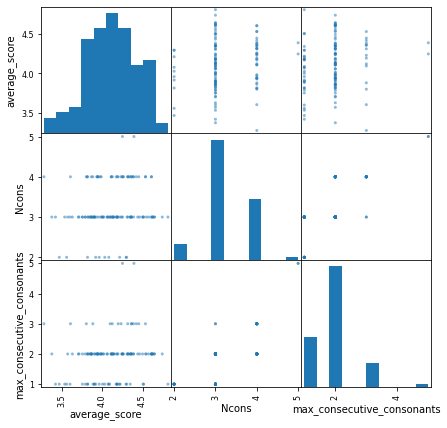

In [ ]:

fig = pd.plotting.scatter_matrix(df_wordle[['average_score','Ncons','max_consecutive_consonants']], alpha=0.5,figsize=(7,7))

Ols regressions

In [ ]:
outcome_1, predictors_1 = patsy.dmatrices('average_score ~ max_consecutive_consonants', df_wordle)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.460
Date:                Mon, 06 Jun 2022   Prob (F-statistic):             0.0653
Time:                        21:53:26   Log-Likelihood:                -30.841
No. Observations:                 122   AIC:                             65.68
Df Residuals:                     120   BIC:                             71.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
outcome_2, predictors_2 = patsy.dmatrices('average_score ~ Ncons', df_wordle)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.883
Date:                Mon, 06 Jun 2022   Prob (F-statistic):             0.0921
Time:                        21:53:26   Log-Likelihood:                -31.127
No. Observations:                 122   AIC:                             66.25
Df Residuals:                     120   BIC:                             71.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8628      0.152     25.418      0.0

It seems that neither the number of consonants nor consecutive consonants have a strong effect on score.

Is there a relationship between the obscurity of the word and the number of guesses people need to solve the wordle?

In [ ]:
res_3=sm.OLS(df_wordle['average_score'],(df_wordle['occurrence']  / df_wordle['occurrence'].abs().max())).fit()
print(res_3.summary())

                                 OLS Regression Results                                
Dep. Variable:          average_score   R-squared (uncentered):                   0.074
Model:                            OLS   Adj. R-squared (uncentered):              0.066
Method:                 Least Squares   F-statistic:                              9.679
Date:                Mon, 06 Jun 2022   Prob (F-statistic):                     0.00232
Time:                        21:53:26   Log-Likelihood:                         -341.40
No. Observations:                 122   AIC:                                      684.8
Df Residuals:                     121   BIC:                                      687.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

It appears to be no. Does the obscurity have any relation with the amount of yellow/green boxes guessed correctly on the first guess?

In [ ]:
def get_wordle_avg_score_first_guess(wordle_number,tweet_dataframe): 
    temp=tweet_dataframe[tweet_dataframe['wordle_id']== wordle_number]
    return temp['first_guess_number_correct'].mean()

In [ ]:
new_column=[]
for i in range(210,334):
    new_column.append(get_wordle_avg_score_first_guess(i,df_tweets))
new_column = [x for x in new_column if np.isnan(x) == False]
df_wordle['average_score_first_guess']=new_column

In [ ]:
res_4=sm.OLS(df_wordle['average_score_first_guess'],(df_wordle['occurrence']  / df_wordle['occurrence'].abs().max())).fit()
print(res_4.summary())

                                    OLS Regression Results                                    
Dep. Variable:     average_score_first_guess   R-squared (uncentered):                   0.068
Model:                                   OLS   Adj. R-squared (uncentered):              0.060
Method:                        Least Squares   F-statistic:                              8.851
Date:                       Mon, 06 Jun 2022   Prob (F-statistic):                     0.00354
Time:                               21:53:27   Log-Likelihood:                         -227.38
No. Observations:                        122   AIC:                                      456.8
Df Residuals:                            121   BIC:                                      459.6
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                 coef    std err          t      P

This is also not correlated.

# Ethics & Privacy

The Wordle Tweets dataset does include some personal-identifying information, including the user’s username, tweet, and tweet ID. While this is not particularly intrusive, it is possible to use this information to gather more data from a user’s Twitter profile, sometimes including their location, data of birth, bio, and other personal information. To avoid any privacy issues, our project does not use any information about the person behind the tweet – our dataset removes the user’s username and tweet ID. We also remove any text following the wordle score in the user’s tweet. As far as privacy is concerned, we consider our access to this data to be ethical. As for the wordle-words dataset, the only accessible information includes the wordle’s day, number, and frequency of occurrence. There is no personal-identifying information and no bias involved in this dataset, so we have no concerns when it comes to using or sharing it.

Additionally, we do not recognize any ways that our project’s results can be used unethically, and as such we do not have any ethical concerns about our project’s deployment.

# Conclusion & Discussion

After analyzing our data, we unfortunately did not observe any correlations between any of our proposed factors and Wordle difficulty. We did find one significant result – players require fewer attempts when the first green square they receive from the hint is displayed at the start of the word, rather than at the end. In other words, green squares are generally more useful at the start of words than at the end of words.


Our project comes with many limitations. Firstly, we are missing perspective from experts in the subject. As mentioned previously, there are probably many factors that contribute to a word’s difficulty, and it is unlikely that we accounted for them all. It would have been beneficial to ask professionals in the field (e.g. linguists) for their perspective beforehand. Secondly, we did not account for a variety of other potential variables that could affect a Wordle puzzle’s difficulty. For instance, it is possible that a player’s time of day affects their score, but our dataset includes all times of day and players of different time zones. It is possible that age, dialect, English proficiency, and education level all affect a puzzle’s difficulty for different players. Thirdly, our measure of difficulty as the average number of attempts is not necessarily valid. Most importantly, our dataset is not that large – there is a good number of Wordle words, but not a good number of Wordle words with each word feature we are looking for. Additionally, we are grading difficulty on a very small scale (1 to 6). There is not a lot of room for variance, and as such it is hard to have significant results.

# Team Contributions

- Roger Thavixay: Helped contribute with the database and data cleaning. Testing data visualization. Designed the Wordle theme presentation.
- Yunfei Jiao: Contributed to data cleaning, EDA, data analysis, data visualization, and presentation.
- David Wang: performed data cleanup, some EDA, analysis, and helped with presentation slides. 
- Sidney Ma: wrote text for Overview, Background, Datasets, Cleaning, Ethics, Conclusion, and Presentation. 
- Akira Isayama: Helped with background, cleaning, ethics, and presentation.

Video link: https://youtu.be/6xBuQ1X5QB8